<a href="https://colab.research.google.com/github/20241984/Ejercicios/blob/main/Ejercicio_Arbol_de_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# importamos Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [55]:
# Cargados los datos
df = pd.read_csv('/content/sample_data/Boston_Housing_from_Sklearn.csv')
df.head()


,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


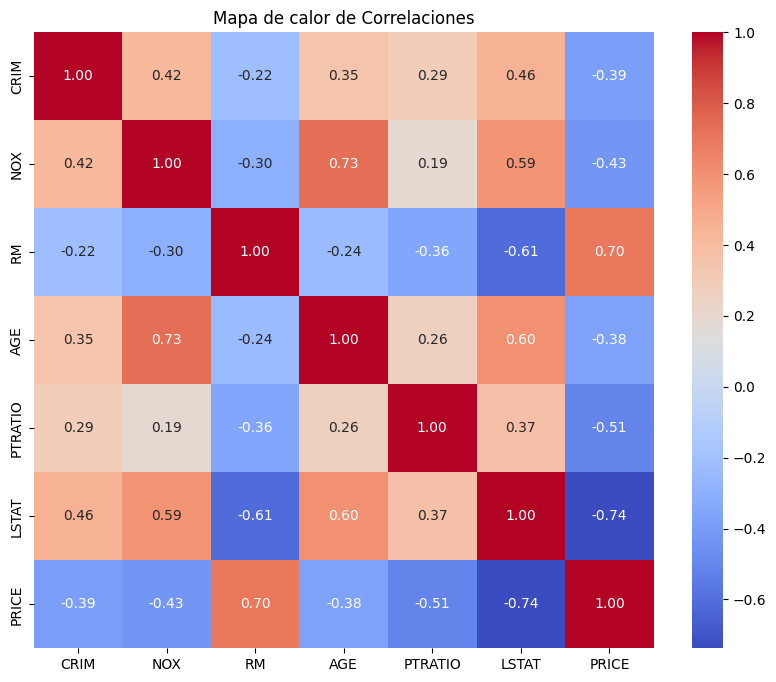

In [57]:
# CRIM     índice de criminalidad per cápita por ciudad
# NOX      concentración de óxidos nítricos (partes por 10 millones)
# RM       número promedio de habitaciones por vivienda
# AGE      proporción de unidades ocupadas por sus propietarios construidas antes de 1940
# PTRATIO  proporción de alumnos por profesor por ciudad
# LSTAT    % de menor nivel económico de la población
# PRICE   Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares
# El objetivo final de esta tarea es predecir el PRECIO basándose en las características disponibles
# usando un modelo de regresión lineal.

# 1) Realicen un mapa de calor de las correlaciones.

correlation_matrix = df.corr()
plt.figure(figsize =(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title ('Mapa de calor de Correlaciones')
plt.show()

In [58]:
# Identifiquen cualquier característica que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -)
# o mayor con el precio. Limitaremos nuestros análisis de estas tres características.
correlation_with_price = correlation_matrix['PRICE']
significant_correlations = correlation_with_price[abs(correlation_with_price) >=0.5].drop('PRICE')
significant_features = significant_correlations.index.tolist()
significant_features



['RM', 'PTRATIO', 'LSTAT']

In [59]:
# 2) Seleccionen las columnas para la matriz de características (X)
# y seleccionen el PRECIO para el vector objetivo (y).
X = df[significant_features]
y= df['PRICE']


In [60]:
# 3) Dividan los datos en grupos de entrenamiento y de prueba. ¡Usen el número 42 para la consistencia!
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)



In [61]:
# 4) Instancien el modelo y ajústenlo al conjunto de entrenamiento.
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [62]:
# 5) Evaluar el modelo de rendimiento en el conjunto de entrenamiento y de prueba usando la puntuación R^2.
# ¿Existe alguna diferencia entre el modelo de rendimiento en los datos de entrenamiento vs. los datos de prueba?
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))
print("R^2 en el conjunto de entrenamiento:", train_r2)
print("R^2 en el conjunto de prueba:", test_r2)


R^2 en el conjunto de entrenamiento: 0.6850018441906278
R^2 en el conjunto de prueba: 0.650904156861472


In [63]:
# 6) Evalúen el modelo usando el error absoluto medio (EAM).
train_mae = mean_absolute_error(y_train,model.predict(X_train))
test_mae = mean_absolute_error(y_test,model.predict(X_test))
print("Error Absoluto Medio en el conjunto de entrenamiento:", train_mae)
print("Error Absoluto Medio en el conjunto de entrenamiento:", test_mae)


Error Absoluto Medio en el conjunto de entrenamiento: 3.6950990395279786
Error Absoluto Medio en el conjunto de entrenamiento: 3.5911786565829553


In [64]:
# 7) Evalúen el modelo usando el error cuadrático medio (ECM).
train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, model.predict(X_test))
print("El Error Cuadratico Medio en el conjunto de entrenamiento:", train_mse)
print("El Error Cuadratico Medio en el conjunto de entrenamiento:", test_mse)


El Error Cuadratico Medio en el conjunto de entrenamiento: 27.687244667341563
El Error Cuadratico Medio en el conjunto de entrenamiento: 26.01221192212625


In [65]:
# 8) Evalúen el modelo de rendimiento usando RECM en el conjunto de entrenamiento y de prueba.
# Esta métrica es útil porque las unidades estarán en las mismas unidas del vector objetivo.
# En este caso mil dólares.
train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
print("El RECM en el conjunto de entrenamiento:", train_rmse)
print("El RECM en el conjunto de entrenamiento:", test_rmse)

El RECM en el conjunto de entrenamiento: 5.261867032464956
El RECM en el conjunto de entrenamiento: 5.100216850500207


In [66]:
# Arboles de Regresion importamos la libreria
from sklearn.tree import DecisionTreeRegressor

#1) Ejecutar un modelo de árbol de regresión con los parámetros por defecto (profundidad ilimitada)
tree_reg_default = DecisionTreeRegressor(random_state=42)
tree_reg_default.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [67]:
#  Evaluacion del modelo del arbol de regresion por defecto
tree_reg_default_train_r2 = tree_reg_default.score(X_train,y_train)
tree_reg_default_test_r2 = tree_reg_default.score(X_test,y_test)
print("Arbol de Regresión con profundidad ilimitada - R2 en el conjunto de entrenamiento:", tree_reg_default_train_r2)
print("Arbol de Regresión con profundidad ilimitada - R2 en el conjunto de prueba:", tree_reg_default_test_r2)

Arbol de Regresión con profundidad ilimitada - R2 en el conjunto de entrenamiento: 1.0
Arbol de Regresión con profundidad ilimitada - R2 en el conjunto de prueba: 0.5253792604267167


In [68]:
# 2) Determinar la profundidad del árbol por defecto.
defaul_tree_depth = tree_reg_default.get_depth()
print("Profundidad del arbol por defecto:",defaul_tree_depth)


Profundidad del arbol por defecto: 19


In [72]:
# 3) Intentar diferentes valores para max_depth y determinar el valor óptimo basándose en el mejor (el más alto) valor R2.
# ¿Cuál es el max_depth óptimo según las pruebas de ustedes?
best_max_depth = None
best_r2_score = -float('inf')
# probamos diferentes valores de profundidad
for depth in range (1,20):
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_train, y_train)
    train_r2 = tree_reg.score(X_train, y_train)
    test_r2 = tree_reg.score(X_test, y_test)

    if test_r2 > best_r2_score:
       best_r2_score = test_r2
       best_max_depth = depth

print("El max_depth óptimo es:", best_max_depth)
print("el r2 más alto en el conjunto de prueba con max_depth óptimo es:", best_r2_score )


El max_depth óptimo es: 6
el r2 más alto en el conjunto de prueba con max_depth óptimo es: 0.7497141908455609


In [73]:
# Construir el modelo final con el max_dept óptimo
final_tree_reg = DecisionTreeRegressor(max_depth=best_max_depth, random_state=42)
final_tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=6, random_state=42)

In [74]:
# Evalucion del modelo final
final_train_r2 = final_tree_reg.score(X_train,y_train)
final_test_r2 = final_tree_reg.score(X_test,y_test)
print("Arbol de regresión con max_depth óptimo - R2 en el conjunto de entrenamiento:", final_train_r2)
print("Arbol de regresión con max_depth óptimo - R2 en el conjunto de prueba:", final_test_r2)



Arbol de regresión con max_depth óptimo - R2 en el conjunto de entrenamiento: 0.9197966088386647
Arbol de regresión con max_depth óptimo - R2 en el conjunto de prueba: 0.7497141908455609
